In [46]:
import numpy as np
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
# Load the dataset
data = pd.read_csv('data/data.csv')
data.head(10)

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257
5,6,Product_6,Toys,82.22,3.6,270,834,288,38,422,329,245,614,979,851,630,738,485
6,7,Product_7,Electronics,33.75,3.8,632,565,140,539,244,188,700,896,965,447,66,32,516
7,8,Product_8,Electronics,433.76,4.4,906,905,83,48,926,94,555,280,102,202,753,376,445
8,9,Product_9,Electronics,302.55,2.0,848,809,693,419,106,616,85,42,992,696,298,213,708
9,10,Product_10,Clothing,355.50,3.0,400,319,390,636,87,7,555,485,566,632,462,561,179


In [47]:
data.shape

(1000, 18)

In [48]:
data.columns

Index(['product_id', 'product_name', 'category', 'price', 'review_score',
       'review_count', 'sales_month_1', 'sales_month_2', 'sales_month_3',
       'sales_month_4', 'sales_month_5', 'sales_month_6', 'sales_month_7',
       'sales_month_8', 'sales_month_9', 'sales_month_10', 'sales_month_11',
       'sales_month_12'],
      dtype='object')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [50]:
data.duplicated().sum()

0

In [ ]:
import pandas as pd
data.isna().any()


# Function to impute missing values in the sales data for a product
def impute_missing_sales(row):
    # Loop through each month (sales_month_1 to sales_month_12)
    for month in range(1, 13):  
        month_column = f'sales_month_{month}'
        if pd.isna(row[month_column]):  # If the value is missing
            # Calculate the mean of the other 11 months
            other_months = row.drop(month_column)  # Exclude the current month
            mean_value = other_months.mean()  # Calculate the mean of the remaining values
            row[month_column] = mean_value  # Replace the missing value with the mean
    return row

# Example usage:
# Apply the impute_missing_sales function to each row of the Data
data = data.apply(impute_missing_sales, axis=1)

In [52]:
data.isnull().sum()

product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64

In [53]:
data.describe()

,product_id,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,247.677130,3.027600,526.506000,498.306000,507.661000,506.739000,503.823000,487.194000,491.653000,507.011000,504.569000,491.934000,514.798000,505.83800,500.386000
std,288.819436,144.607983,1.171243,282.269932,289.941478,285.992689,294.010873,286.645567,287.844324,289.234018,291.047287,289.945691,287.514731,288.710119,288.82451,278.509459
min,1.000000,7.290000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.00000,4.000000
25%,250.750000,121.810000,2.000000,283.750000,245.500000,262.500000,243.750000,261.500000,221.000000,236.000000,254.000000,240.500000,247.250000,267.000000,251.25000,259.000000
50%,500.500000,250.920000,3.100000,543.000000,507.500000,508.000000,493.000000,501.500000,497.000000,479.500000,522.500000,499.500000,495.500000,532.000000,502.00000,500.500000
75%,750.250000,373.435000,4.000000,772.000000,740.750000,756.250000,777.250000,749.500000,727.000000,740.500000,757.250000,762.250000,735.250000,770.250000,761.00000,730.000000
max,1000.000000,499.860000,5.000000,999.000000,1000.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000


In [54]:
data['category'].unique()

array(['Clothing', 'Home & Kitchen', 'Toys', 'Books', 'Electronics',
       'Health', 'Sports'], dtype=object)

In [55]:
data['category'].value_counts()

category
Books             154
Sports            153
Toys              151
Clothing          140
Health            139
Electronics       138
Home & Kitchen    125
Name: count, dtype: int64

In [56]:
#Graph of percentage of each product category
fig = px.pie(values = data['category'].value_counts(), names = data['category'].unique(),
            title = 'Percentage of Each Product Category')
fig.update_traces(textinfo = 'label+percent')
fig.show()

In [57]:
#Creating a new column total sales by summing the sales over the past year
data['total_sales'] = data[['sales_month_1', 'sales_month_2', 'sales_month_3', 
                        'sales_month_4', 'sales_month_5', 'sales_month_6', 
                        'sales_month_7', 'sales_month_8', 'sales_month_9', 
                        'sales_month_10', 'sales_month_11', 'sales_month_12']].sum(axis = 1)
data.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094


In [58]:
#Creating a new dataframe with total sales
new_data = data[['product_name', 'category', 'price', 'review_score', 'review_count', 'total_sales']]
new_data.head(10)

,product_name,category,price,review_score,review_count,total_sales
0,Product_1,Clothing,190.40,1.7,220,6421
1,Product_2,Home & Kitchen,475.60,3.2,903,6027
2,Product_3,Toys,367.34,4.5,163,5580
3,Product_4,Toys,301.34,3.9,951,5022
4,Product_5,Books,82.23,4.2,220,6094
5,Product_6,Toys,82.22,3.6,270,6453
6,Product_7,Electronics,33.75,3.8,632,5298
7,Product_8,Electronics,433.76,4.4,906,4769
8,Product_9,Electronics,302.55,2.0,848,5677
9,Product_10,Clothing,355.50,3.0,400,4879


In [59]:
sales_max = np.max(new_data['total_sales'])
print("Maximum total sales is: ", sales_max, "units")

Maximum total sales is:  9151 units


In [60]:
category_max = new_data.groupby('category')['total_sales'].max().idxmax()
print("Product category with maximum sales is: ", category_max)

Product category with maximum sales is:  Electronics


In [61]:
sales_min = np.min(new_data['total_sales'])
print("Minimum total sales is: ", sales_min, "units")

Minimum total sales is:  2972 units


In [62]:
new_data.describe()

,price,review_score,review_count,total_sales
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,247.677130,3.027600,526.506000,6019.912000
std,144.607983,1.171243,282.269932,992.273787
min,7.290000,1.000000,1.000000,2972.000000
25%,121.810000,2.000000,283.750000,5392.000000
50%,250.920000,3.100000,543.000000,5992.000000
75%,373.435000,4.000000,772.000000,6680.000000
max,499.860000,5.000000,999.000000,9151.000000


In [63]:
#Top performing product
product = new_data.groupby('product_name').sum()
product_10 = product.sort_values(['total_sales'], ascending = False).head(10)
product_10

,category,price,review_score,review_count,total_sales
product_name,,,,,
Product_224,Electronics,187.02,4.8,613,9151
Product_286,Clothing,22.79,3.1,728,8921
Product_734,Health,263.92,2.7,30,8914
Product_905,Sports,213.61,4.0,520,8783
Product_180,Sports,73.07,3.2,268,8775
Product_853,Books,108.90,4.4,305,8765
Product_239,Health,324.51,4.9,575,8724
Product_924,Electronics,400.93,2.4,758,8525
Product_937,Electronics,14.10,2.1,883,8459


In [64]:
#Graph of 10 best performing products
fig = px.bar(x = product_10['total_sales'], y = product_10.index, 
            title = 'Top 10 Best Performing Products', text_auto = True)
fig.update_traces(orientation = 'h', marker_color = 'peachpuff', 
                  marker_line_color = 'coral', marker_line_width = 1)
fig.update_xaxes(title = 'Total Sales')
fig.update_yaxes(title = 'Product Name')
fig.update_layout(yaxis = {'categoryorder' : 'total ascending'})
fig.show()

In [65]:
#Least performing product
product_last = new_data.groupby('product_name').sum()
product_last_10 = product_last.sort_values(['total_sales'], ascending = True).head(10)
product_last_10

,category,price,review_score,review_count,total_sales
product_name,,,,,
Product_123,Health,162.41,4.4,650,2972
Product_692,Toys,215.59,3.0,514,3162
Product_786,Books,454.68,4.6,325,3286
Product_666,Home & Kitchen,80.67,4.4,655,3301
Product_136,Home & Kitchen,164.99,1.3,68,3391
Product_179,Sports,468.68,4.0,504,3443
Product_95,Electronics,386.63,1.9,610,3539
Product_815,Health,435.60,1.3,234,3551
Product_544,Clothing,337.49,2.0,913,3564


In [66]:
#Graph of least performing products
fig = px.bar(x = product_last_10['total_sales'], y = product_last_10.index, 
            title = 'Ten Least Performing Products', text_auto = True)
fig.update_traces(orientation = 'h', marker_color = 'peru', 
                  marker_line_color = 'saddlebrown', marker_line_width = 2)
fig.update_xaxes(title = 'Total Sales')
fig.update_yaxes(title = 'Product Name')
fig.update_layout(yaxis = {'categoryorder' : 'total descending'})
fig.show()

Monthly Sales Analysis

In [67]:
#Top performing product category in sales month 1
sm_1 = data.groupby('category')[['sales_month_1']].sum()
sm1_1 = sm_1.sort_values(by = ['sales_month_1'], ascending = False)
sm1_1

,sales_month_1
category,
Toys,79836
Books,77932
Sports,77737
Electronics,76347
Health,67644
Clothing,60966
Home & Kitchen,57844


In [68]:
##Top performing product category in sales month 2
sm_2 = data.groupby('category')[['sales_month_2']].sum()
sm2_2 = sm_2.sort_values(by = ['sales_month_2'], ascending = False)
sm2_2

,sales_month_2
category,
Sports,82244
Toys,80271
Books,80079
Electronics,72472
Clothing,67911
Health,67432
Home & Kitchen,57252


In [69]:
#Top performing product category in sales month 3
sm_3 = data.groupby('category')[['sales_month_3']].sum()
sm3_3 = sm_3.sort_values(by = ['sales_month_3'], ascending = False)
sm3_3

,sales_month_3
category,
Books,76998
Toys,76859
Clothing,76796
Sports,75109
Electronics,70708
Health,67602
Home & Kitchen,62667


In [70]:
#Top performing product category in sales month 4
sm_4 = data.groupby('category')[['sales_month_4']].sum()
sm4_4 = sm_4.sort_values(by = ['sales_month_4'], ascending = False)
sm4_4

,sales_month_4
category,
Books,74699
Sports,74287
Toys,73278
Electronics,73158
Health,72925
Clothing,70088
Home & Kitchen,65388


In [71]:
#Top performing product category in sales month 5
sm_5 = data.groupby('category')[['sales_month_5']].sum()
sm5_5 = sm_5.sort_values(by = ['sales_month_5'], ascending = False)
sm5_5

,sales_month_5
category,
Books,79051
Sports,73467
Electronics,72169
Toys,71920
Health,69178
Clothing,61643
Home & Kitchen,59766


In [72]:
#Top performing product category in sales month 6
sm_6 = data.groupby('category')[['sales_month_6']].sum()
sm6_6 = sm_6.sort_values(by = ['sales_month_6'], ascending = False)
sm6_6

,sales_month_6
category,
Toys,79090
Books,76644
Sports,75641
Electronics,70060
Health,63926
Home & Kitchen,63169
Clothing,63123


In [73]:
#Top performing product category in sales month 7
sm_7 = data.groupby('category')[['sales_month_7']].sum()
sm7_7 = sm_7.sort_values(by = ['sales_month_7'], ascending = False)
sm7_7

,sales_month_7
category,
Books,79114
Toys,77102
Sports,77082
Health,75256
Electronics,72223
Clothing,66105
Home & Kitchen,60129


In [74]:
#Top performing product category in sales month 8
sm_8 = data.groupby('category')[['sales_month_8']].sum()
sm8_8 = sm_8.sort_values(by = ['sales_month_8'], ascending = False)
sm8_8

,sales_month_8
category,
Toys,78205
Books,78108
Clothing,74422
Sports,73912
Health,69126
Electronics,65754
Home & Kitchen,65042


In [75]:
#Top performing product category in sales month 9
sm_9 = data.groupby('category')[['sales_month_9']].sum()
sm9_9 = sm_9.sort_values(by = ['sales_month_9'], ascending = False)
sm9_9

,sales_month_9
category,
Sports,79209
Books,77211
Clothing,72675
Toys,70209
Electronics,69914
Health,64581
Home & Kitchen,58135


In [76]:
#Top performing product category in sales month 10
sm_10 = data.groupby('category')[['sales_month_10']].sum()
sm10_10 = sm_10.sort_values(by = ['sales_month_10'], ascending = False)
sm10_10

,sales_month_10
category,
Books,83504
Sports,80187
Toys,74664
Health,72613
Electronics,70148
Clothing,68806
Home & Kitchen,64876


In [77]:
#Top performing product category in sales month 11
sm_11 = data.groupby('category')[['sales_month_11']].sum()
sm11_11 = sm_11.sort_values(by = ['sales_month_11'], ascending = False)
sm11_11

,sales_month_11
category,
Books,76557
Toys,76399
Sports,74270
Health,72500
Clothing,71683
Electronics,68148
Home & Kitchen,66281


In [78]:
#Top performing product category in sales month 12
sm_12 = data.groupby('category')[['sales_month_12']].sum()
sm12_12 = sm_12.sort_values(by = ['sales_month_12'], ascending = False)
sm12_12

,sales_month_12
category,
Toys,79268
Books,78332
Sports,73226
Clothing,72318
Health,71631
Electronics,64019
Home & Kitchen,61592


In [79]:
#Graph of Top performing product categories Over The Past Year
fig = make_subplots(rows = 4, cols = 3, 
                    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}],
                           [{"type": "pie"}, {"type": "pie"}, {"type": "pie"}],
                           [{"type": "pie"}, {"type": "pie"}, {"type": "pie"}],
                           [{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
                           
                    subplot_titles = ('Month 1', 'Month 2', 'Month 3', 'Month 4', 
                                      'Month 5', 'Month 6', 'Month 7', 'Month 8',
                                      'Month 9', 'Month 10', 'Month 11', 'Month 12'))
fig1 = px.pie(values = sm1_1['sales_month_1'], names = sm1_1.index)
for trace in fig1.data:
    fig.add_trace(fig1.data[0], row=1, col=1)

fig2 = px.pie(values = sm2_2['sales_month_2'], names = sm2_2.index)
for trace in fig2.data:
    fig.add_trace(fig2.data[0], row=1, col=2)

fig3 = px.pie(values = sm3_3['sales_month_3'], names = sm3_3.index)
for trace in fig3.data:
    fig.add_trace(fig3.data[0], row=1, col=3)

fig4 = px.pie(values = sm4_4['sales_month_4'], names = sm4_4.index)
for trace in fig4.data:
    fig.add_trace(fig4.data[0], row=2, col=1)    

fig5 = px.pie(values = sm5_5['sales_month_5'], names = sm5_5.index)
for trace in fig5.data:
    fig.add_trace(fig5.data[0], row=2, col=2)
    
fig6 = px.pie(values = sm6_6['sales_month_6'], names = sm6_6.index)
for trace in fig6.data:
    fig.add_trace(fig6.data[0], row=2, col=3)
    
fig7 = px.pie(values = sm7_7['sales_month_7'], names = sm7_7.index)
for trace in fig7.data:
    fig.add_trace(fig7.data[0], row=3, col=1)
    
fig8 = px.pie(values = sm8_8['sales_month_8'], names = sm8_8.index)
for trace in fig8.data:
    fig.add_trace(fig8.data[0], row=3, col=2)
    
fig9 = px.pie(values = sm9_9['sales_month_9'], names = sm9_9.index)
for trace in fig9.data:
    fig.add_trace(fig9.data[0], row=3, col=3)
    
fig10 = px.pie(values = sm10_10['sales_month_10'], names = sm10_10.index)
for trace in fig10.data:
    fig.add_trace(fig10.data[0], row=4, col=1)
    
fig11 = px.pie(values = sm11_11['sales_month_11'], names = sm11_11.index)
for trace in fig11.data:
    fig.add_trace(fig11.data[0], row=4, col=2)

fig12 = px.pie(values = sm12_12['sales_month_12'], names = sm12_12.index)
for trace in fig12.data:
    fig.add_trace(fig12.data[0], row=4, col=3)
    
    
fig.update_traces(marker_line_width = 1, textinfo = 'label+percent',textposition = "inside", textfont_size = 10)
fig.update_layout(title = 'Top Performing Product Categories Over The Past Year',
                  height = 1200)
fig.show()

In [80]:
#Exploring review score and count
score = data.groupby('review_score').sum()
score

,product_id,product_name,category,price,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales
review_score,,,,,,,,,,,,,,,,,,
1.0,7153,Product_169Product_265Product_284Product_427Pr...,BooksHome & KitchenBooksSportsHome & KitchenBo...,2696.98,5856,6007,5478,6743,7228,5365,5549,5734,5506,6223,5071,5312,5895,70111
1.1,10842,Product_20Product_31Product_48Product_50Produc...,Home & KitchenHealthToysHealthBooksBooksHome &...,5739.10,14085,10563,14478,12792,14539,13416,11569,11793,13560,11111,13787,13771,11662,153041
1.2,13122,Product_14Product_73Product_101Product_195Prod...,BooksHealthSportsClothingBooksElectronicsHome ...,5386.69,13588,10223,12414,12287,12146,11264,11103,13988,13661,11331,11928,10211,12101,142657
1.3,15369,Product_35Product_39Product_127Product_133Prod...,ClothingHome & KitchenToysToysHome & KitchenBo...,6987.70,16106,17478,14665,14760,16427,13805,14234,15101,14723,12923,15742,18766,15148,183772
1.4,14071,Product_68Product_82Product_117Product_178Prod...,BooksClothingElectronicsHealthBooksClothingSpo...,7481.06,12339,12314,13706,17458,13058,14202,13358,14169,14211,11517,13155,14908,14860,166916
1.5,16152,Product_34Product_120Product_162Product_200Pro...,ToysToysToysSportsBooksClothingToysToysElectro...,7179.76,16331,16340,14657,13268,14207,14565,14865,12301,18356,15916,14458,15325,14037,178295
1.6,10169,Product_110Product_157Product_165Product_222Pr...,ElectronicsElectronicsBooksSportsToysToysBooks...,4320.98,8416,9694,11322,9225,8284,8603,9208,8814,8465,8876,9789,9839,10180,112299
1.7,13186,Product_1Product_17Product_88Product_96Product...,ClothingToysHealthBooksHome & KitchenBooksSpor...,7287.27,15641,13435,16788,14747,14613,15033,13085,12962,14452,12465,14576,13590,16695,172441
1.8,10173,Product_257Product_296Product_337Product_362Pr...,Home & KitchenToysToysSportsHealthBooksHealthH...,5090.11,8834,7965,8851,7470,8710,8107,6781,10703,9411,9993,9151,8746,6393,102281


In [81]:
#Graph showing the count of review score 
fig = px.bar(score, x = score.index, y = 'review_count' ,  text_auto = '.0f', 
             title = 'Count of Review Scores From 1 to 5')
fig.update_traces(marker_color = 'moccasin', marker_line_color = 'darkslategray',
                 marker_line_width = 1)
fig.update_xaxes(title = 'Review Score')
fig.update_yaxes(title = 'Review Count')
fig.update_layout(width = 900)
fig.show()

In [82]:
#Graph of Sales Over The Past Year based on review score
fig = make_subplots(rows = 6, cols = 2, 
                    subplot_titles = ('Month 1', 'Month 2', 'Month 3', 'Month 4', 
                                      'Month 5', 'Month 6', 'Month 7', 'Month 8',
                                      'Month 9', 'Month 10', 'Month 11', 'Month 12'))
fig1 = px.bar(score, x = score.index, y = 'sales_month_1')
for trace in fig1.data:
    fig.add_trace(fig1.data[0], row=1, col=1)

fig1 = px.bar(score, x = score.index, y = 'sales_month_2')
for trace in fig1.data:
    fig.add_trace(fig1.data[0], row=1, col=2)

fig1 = px.bar(score, x = score.index, y = 'sales_month_3')
for trace in fig1.data:
    fig.add_trace(fig1.data[0], row=2, col=1)

fig1 = px.bar(score, x = score.index, y = 'sales_month_4')
for trace in fig1.data:
    fig.add_trace(fig1.data[0], row=2, col=2)    

fig1 = px.bar(score, x = score.index, y = 'sales_month_5')
for trace in fig1.data:
    fig.add_trace(fig1.data[0], row=3, col=1)
    
fig1 = px.bar(score, x = score.index, y = 'sales_month_6')
for trace in fig1.data:
    fig.add_trace(fig1.data[0], row=3, col=2)
    
fig1 = px.bar(score, x = score.index, y = 'sales_month_7')
for trace in fig1.data:
    fig.add_trace(fig1.data[0], row=4, col=1)
    
fig1 = px.bar(score, x = score.index, y = 'sales_month_8')
for trace in fig1.data:
    fig.add_trace(fig1.data[0], row=4, col=2)
    
fig1 = px.bar(score, x = score.index, y = 'sales_month_9')
for trace in fig1.data:
    fig.add_trace(fig1.data[0], row=5, col=1)
    
fig1 = px.bar(score, x = score.index, y = 'sales_month_10')
for trace in fig1.data:
    fig.add_trace(fig1.data[0], row=5, col=2)
    
fig1 = px.bar(score, x = score.index, y = 'sales_month_11')
for trace in fig1.data:
    fig.add_trace(fig1.data[0], row=6, col=1)

fig1 = px.bar(score, x = score.index, y = 'sales_month_12')
for trace in fig1.data:
    fig.add_trace(fig1.data[0], row=6, col=2)
    
    
fig.update_traces(marker_color = 'moccasin', marker_line_color = 'darksalmon',
                  marker_line_width = 1)
fig.update_xaxes(title = 'Review Score')
fig.update_yaxes(title = 'Sales')
fig.update_layout(title = 'Count of Sales Based on Review Score Over The Past Year',
                  height = 1200, width = 900)
fig.show()

Inventory Optimization

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [84]:
# Load the data
data = pd.read_csv("data/data.csv")

# Check for missing values and handle them (fill or drop)
data.fillna(method='ffill', inplace=True)

# Feature Engineering
data['total_sales'] = data.loc[:, 'sales_month_1':'sales_month_12'].sum(axis=1)  # Total sales for the year


C:\Users\User\AppData\Local\Temp\ipykernel_1968\663125.py:5: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [85]:
# Group data by category
categories = data['category'].unique()

# Create a dictionary to store results
category_results = {}

data['category'].value_counts()


category
Books             154
Sports            153
Toys              151
Clothing          140
Health            139
Electronics       138
Home & Kitchen    125
Name: count, dtype: int64

In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import randint

# Assuming 'data' and 'categories' are already defined
category_results = {}

for category in categories:
    category_data = data[data['category'] == category]

    # Features and target variable for the model
    X = category_data[['price', 'review_score', 'review_count']]
    y = category_data['total_sales']

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define parameter distributions instead of grids for RandomizedSearchCV
    param_dist = {
        'n_estimators': randint(50, 200),  # Random range for n_estimators
        'max_depth': [None, 10, 20, 30],  # Max depth options
        'min_samples_split': randint(2, 10),  # Random range for min_samples_split
        'min_samples_leaf': randint(1, 4)  # Random range for min_samples_leaf
    }

    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                       param_distributions=param_dist,
                                       n_iter=50,  # Number of random combinations to sample
                                       cv=5,  # 5-fold cross-validation
                                       n_jobs=-1,  # Use all available cores for parallelization
                                       scoring='neg_mean_squared_error',  # Use negative MSE as scoring metric
                                       random_state=42)

    # Fit the model
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_

    # Make predictions with the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store results
    category_results[category] = {
        'model': best_model,
        'mse': mse,
        'mae': mae,
        'predictions': y_pred,
        'true_values': y_test
    }

# Optionally, print the results
for category, results in category_results.items():
    print(f"Category: {category}")
    print(f"Best Model: {results['model']}")
    print(f"MSE: {results['mse']:.4f}")
    print(f"MAE: {results['mae']:.4f}")
    print(f"Predictions: {results['predictions'][:5]}...")  # Display first 5 predictions
    print()


Category: Clothing
Best Model: RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=3,
                      n_estimators=94, random_state=42)
MSE: 1285491.3547
MAE: 890.0043
Predictions: [6014.74931611 7048.50536981 5993.77402482 5926.12968592 5908.14713894]...

Category: Home & Kitchen
Best Model: RandomForestRegressor(min_samples_leaf=3, min_samples_split=7, n_estimators=170,
                      random_state=42)
MSE: 844545.2715
MAE: 787.3600
Predictions: [5650.08153257 6321.9888067  6065.48913087 5554.44815782 5732.15678172]...

Category: Toys
Best Model: RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=9,
                      n_estimators=89, random_state=42)
MSE: 1066353.4696
MAE: 825.5567
Predictions: [5917.05867871 6339.4718722  5957.39855335 5879.86991167 6231.76832233]...

Category: Books
Best Model: RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=9,
                      n_estimators=181, random_state

In [87]:
def calculate_reorder_point(daily_sales, lead_time=5, buffer_days=None, demand_fluctuation_factor=1.2):
    # If buffer_days is not provided, calculate based on demand fluctuations
    if buffer_days is None:
        buffer_days = int(daily_sales * demand_fluctuation_factor)
    
    safety_stock = daily_sales * buffer_days  # Safety stock for buffer days
    reorder_point = (lead_time * daily_sales) + safety_stock
    return reorder_point


In [88]:
import numpy as np
from sklearn.linear_model import LinearRegression

def forecast_demand(daily_sales, days_to_forecast=30):
    # Use linear regression to forecast future demand
    X = np.array(range(len(daily_sales))).reshape(-1, 1)  # Time as a feature
    y = np.array(daily_sales)  # Historical demand as the target
    
    # Train the model
    model = LinearRegression()
    model.fit(X, y)

    # Forecast demand for the next 'days_to_forecast' days
    future_days = np.array(range(len(daily_sales), len(daily_sales) + days_to_forecast)).reshape(-1, 1)
    predicted_demand = model.predict(future_days)
    return predicted_demand[-1]  # Return the forecasted demand for the last day

def calculate_economic_order_quantity(daily_sales, holding_cost=2, order_cost=50, demand_forecast_days=30):
    # Forecast future demand
    forecasted_demand = forecast_demand(daily_sales, demand_forecast_days)
    
    # Calculate EOQ using the forecasted demand
    eoq = np.sqrt((2 * forecasted_demand * order_cost) / holding_cost)
    return eoq


In [89]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Forecasting demand using linear regression
def forecast_demand(daily_sales, days_to_forecast=30):
    # If daily_sales is a single value, return it repeated for the forecast period
    if isinstance(daily_sales, (int, float)):
        return np.full(days_to_forecast, daily_sales)
    
    # Use linear regression to forecast future demand if daily_sales is a time series
    X = np.array(range(len(daily_sales))).reshape(-1, 1)  # Time as a feature
    y = np.array(daily_sales)  # Historical demand as the target
    
    # Train the model
    model = LinearRegression()
    model.fit(X, y)

    # Forecast demand for the next 'days_to_forecast' days
    future_days = np.array(range(len(daily_sales), len(daily_sales) + days_to_forecast)).reshape(-1, 1)
    predicted_demand = model.predict(future_days)
    return predicted_demand

# Calculate Economic Order Quantity (EOQ)
def calculate_economic_order_quantity(daily_sales, holding_cost=2, order_cost=50, demand_forecast_days=30):
    # Forecast future demand
    forecasted_demand = forecast_demand(daily_sales, demand_forecast_days)
    
    # Calculate EOQ using the forecasted demand
    eoq = np.sqrt((2 * forecasted_demand[-1] * order_cost) / holding_cost)
    return eoq

# Calculate Reorder Point (ROP)
def calculate_reorder_point(daily_sales, lead_time=7):
    # Assuming lead time is 7 days
    reorder_point = daily_sales * lead_time
    return reorder_point

# Assuming 'data' is your dataset, and 'categories' is a list of categories you want to analyze
categories = ['Clothing', 'Home & Kitchen', 'Toys', 'Books', 'Electronics', 'Health', 'Sports'] # Replace with your actual categories

category_results = {}

# Example code to loop through categories in your dataset
for category in categories:
    category_data = data[data['category'] == category]  # Filter data for this category
    
    # Features for each product (adjust based on your dataset structure)
    X = category_data[['price', 'review_score', 'review_count']]  # Features
    y = category_data['total_sales']  # Target variable (total sales)
    
    # Get the model predictions (forecasted total sales) for the products in this category
    predictions = y_pred 
    
    # Calculate average daily sales (approximate by dividing by 30)
    average_daily_sales = predictions / 30  # Assuming 30 days in a month
    
    # Store the results for this category
    category_results[category] = {
        'predictions': predictions,
        'average_daily_sales': average_daily_sales
    }

# Calculate reorder points and EOQ for each category
for category, result in category_results.items():
    print(f"Category: {category}")
    
    # Get the model predictions (forecasted total sales)
    predictions = result['predictions']
    
    # Get the average daily sales
    average_daily_sales = result['average_daily_sales']

    # Calculate reorder point (ROP) for each product
    reorder_points = [calculate_reorder_point(daily_sales) for daily_sales in average_daily_sales]
    
    # Calculate Economic Order Quantity (EOQ) for each product
    eoq_values = [calculate_economic_order_quantity(daily_sales) for daily_sales in average_daily_sales]

    # Print ROP and EOQ for each product
    for idx, (rop, eoq) in enumerate(zip(reorder_points, eoq_values)):
        print(f"  Product {idx + 1}: ROP = {rop:.2f} units, EOQ = {eoq:.2f} units")
    
    # Calculate and print the total ROP and EOQ for the category
    total_rop = sum(reorder_points)
    total_eoq = sum(eoq_values)
    
    print(f"  Total ROP for Category {category}: {total_rop:.2f} units")
    print(f"  Total EOQ for Category {category}: {total_eoq:.2f} units\n")


Category: Clothing
  Product 1: ROP = 1477.30 units, EOQ = 102.72 units
  Product 2: ROP = 1448.83 units, EOQ = 101.73 units
  Product 3: ROP = 1383.25 units, EOQ = 99.40 units
  Product 4: ROP = 1445.69 units, EOQ = 101.62 units
  Product 5: ROP = 1391.29 units, EOQ = 99.69 units
  Product 6: ROP = 1348.46 units, EOQ = 98.14 units
  Product 7: ROP = 1335.80 units, EOQ = 97.68 units
  Product 8: ROP = 1367.12 units, EOQ = 98.82 units
  Product 9: ROP = 1404.72 units, EOQ = 100.17 units
  Product 10: ROP = 1268.99 units, EOQ = 95.21 units
  Product 11: ROP = 1410.66 units, EOQ = 100.38 units
  Product 12: ROP = 1418.47 units, EOQ = 100.66 units
  Product 13: ROP = 1415.94 units, EOQ = 100.57 units
  Product 14: ROP = 1444.88 units, EOQ = 101.59 units
  Product 15: ROP = 1327.74 units, EOQ = 97.39 units
  Product 16: ROP = 1350.66 units, EOQ = 98.22 units
  Product 17: ROP = 1303.17 units, EOQ = 96.48 units
  Product 18: ROP = 1425.99 units, EOQ = 100.92 units
  Product 19: ROP = 1367.06

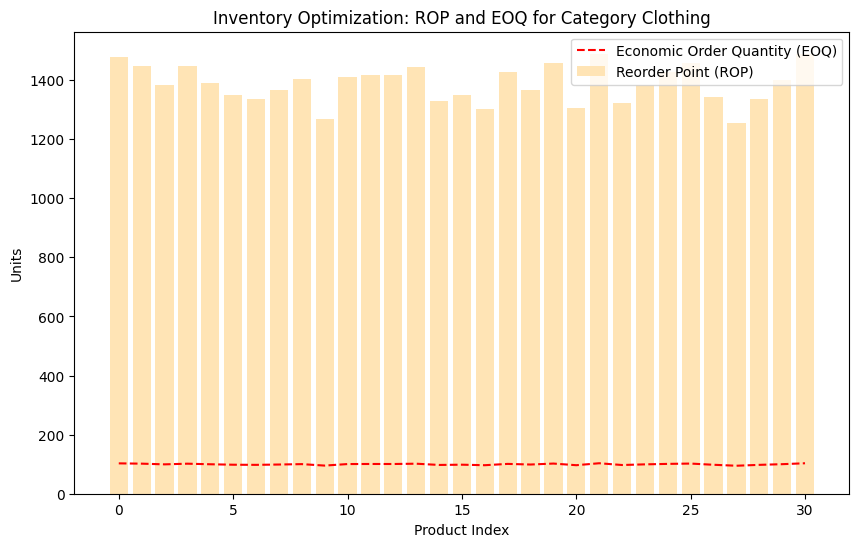

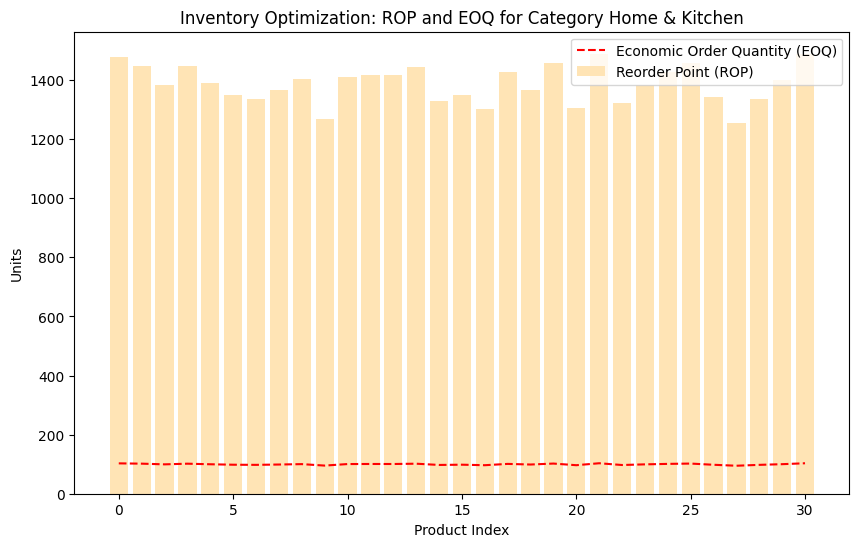

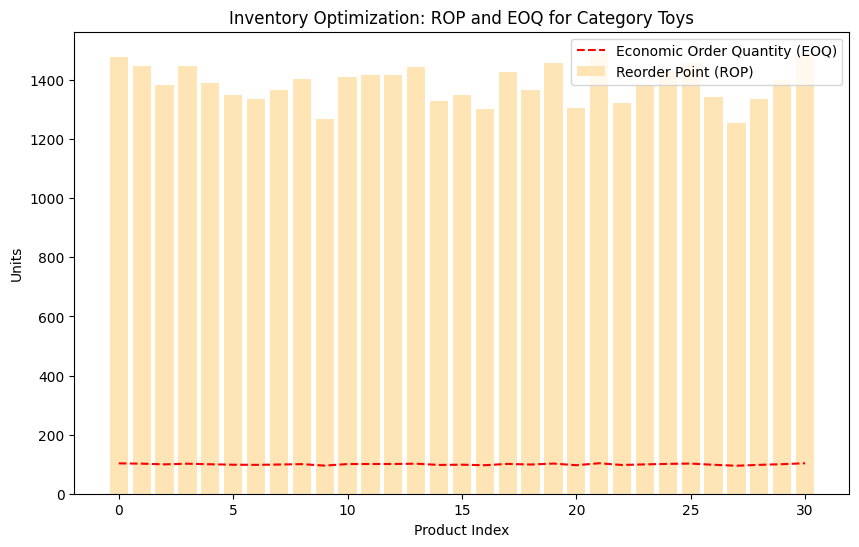

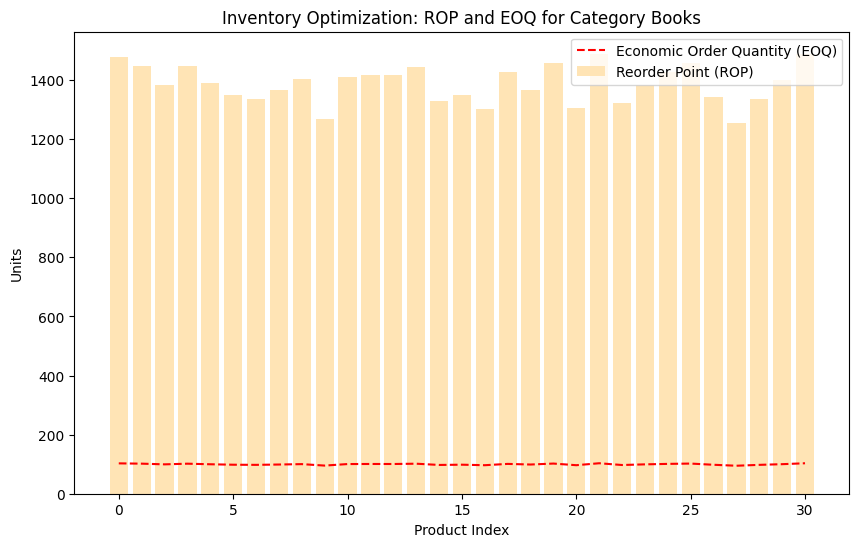

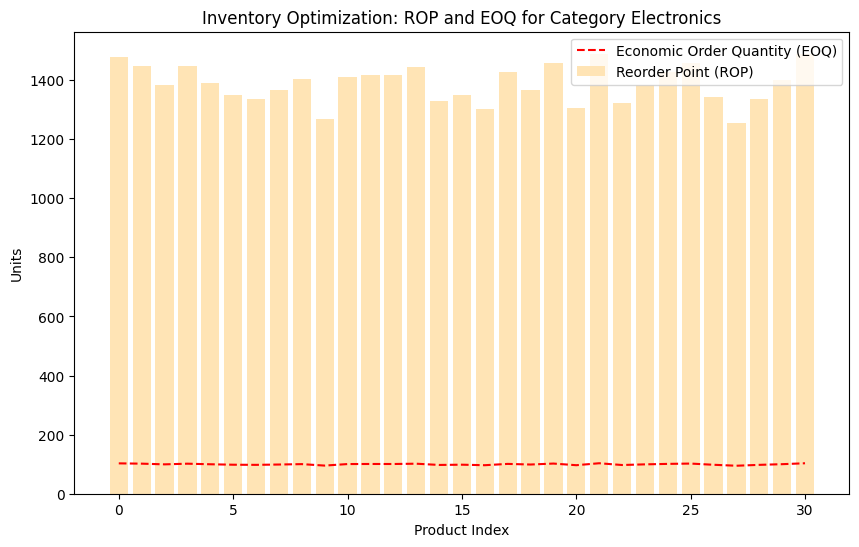

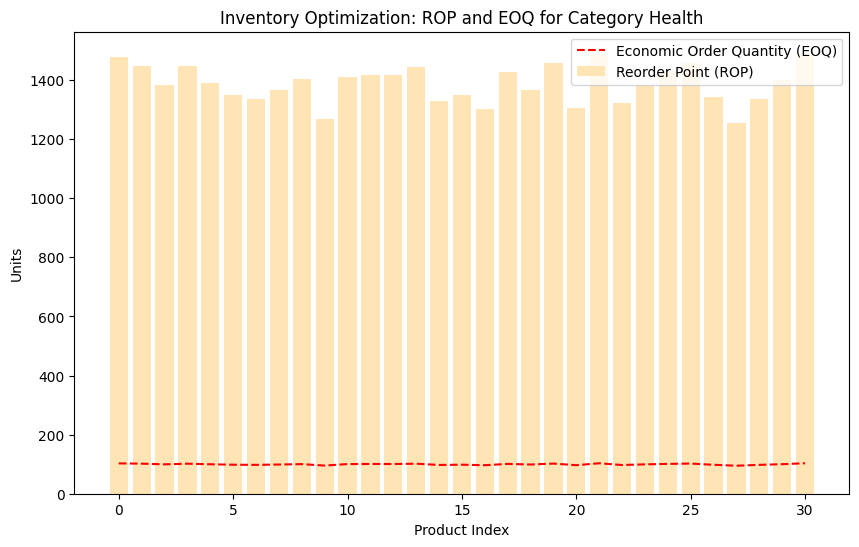

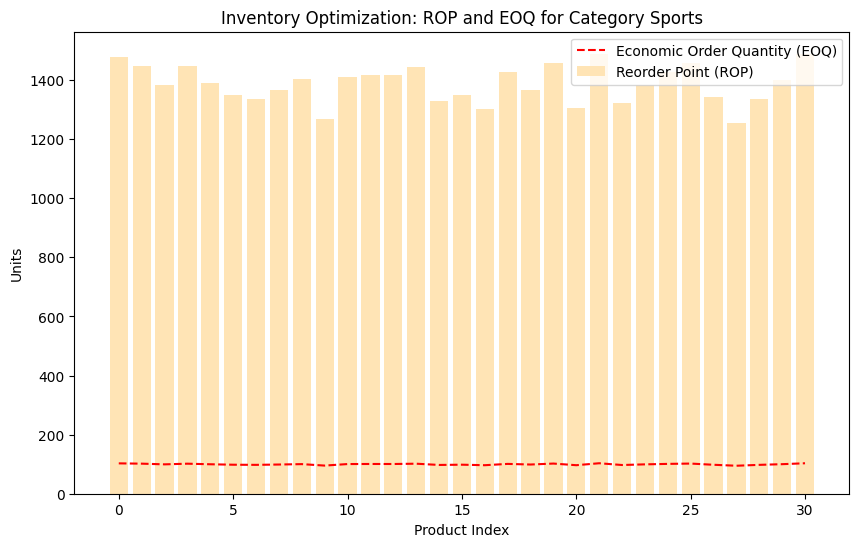

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'category_results' contains the predictions and average_daily_sales as before
for category, result in category_results.items():
    # Get the model predictions (forecasted total sales)
    predictions = result['predictions']
    
    # Calculate average daily sales (approximate by dividing by 30)
    average_daily_sales = predictions / 30  # Assuming 30 days in a month

    # Calculate reorder point (ROP) for each product
    reorder_points = [calculate_reorder_point(daily_sales) for daily_sales in average_daily_sales]
    
    # Calculate Economic Order Quantity (EOQ) for each product
    eoq_values = [calculate_economic_order_quantity(daily_sales) for daily_sales in average_daily_sales]

    # Plot ROP and EOQ for the category
    plt.figure(figsize=(10, 6))
    
    # Plot Reorder Points (ROP) as a bar chart
    plt.bar(range(len(reorder_points)), reorder_points, color='moccasin', label='Reorder Point (ROP)')
    
    # Plot Economic Order Quantity (EOQ) as a line
    plt.plot(range(len(eoq_values)), eoq_values, color='red', linestyle='--', label='Economic Order Quantity (EOQ)')
    
    # Adding labels and title
    plt.xlabel('Product Index')
    plt.ylabel('Units')
    plt.title(f'Inventory Optimization: ROP and EOQ for Category {category}')
    
    # Add legend to the plot
    plt.legend()

    # Show the plot
    plt.show()
